Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Data Sampling and Pre-processing

In [ ]:
df = pd.read_csv("F1DriversDataset 2.csv")
df

In [ ]:
df.head()

In [ ]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [ ]:
nationality_drivers = df['Nationality'].value_counts().sort_values(ascending=False)
nationality_drivers

Nationality
United Kingdom                164
United States                 160
Italy                          99
France                         72
West Germany                   39
Brazil                         32
Argentina                      25
Switzerland                    24
Belgium                        23
South Africa                   23
Japan                          21
Australia                      18
Austria                        16
Netherlands                    16
Spain                          15
Canada                         15
Germany                        14
Sweden                         11
Finland                         9
New Zealand                     9
Mexico                          6
Ireland                         5
Denmark                         5
Portugal                        5
Uruguay                         4
Rhodesia                        4
Monaco                          4
Russia                          3
Venezuela                       3
Ea

In [ ]:
df_winsvsyears = df[['Years_Active','Race_Wins']]
df_winsvsyears.head()

In [ ]:
X= df_winsvsyears['Years_Active'].to_numpy().reshape(-1,1)
y = df_winsvsyears['Race_Wins'].to_numpy().reshape(-1,1).ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

randomf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None)

randomf_regressor.fit(X_train, y_train)

y_pred = randomf_regressor.predict(X_test)

In [ ]:
corr_coef = df['Years_Active'].corr(df['Race_Wins'])
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Correlation Coefficient",corr_coef)

Mean Squared Error:  20.83032334277934
Correlation Coefficient 0.503716776826638


In [ ]:
df_champions = df.query('Championships > 0')
df_champions.head()
df_champions.isnull().sum()

prediction_score 68.33930367927572
correlation coefficient 0.9280326627611925
R-squared: 0.8612446231516298


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


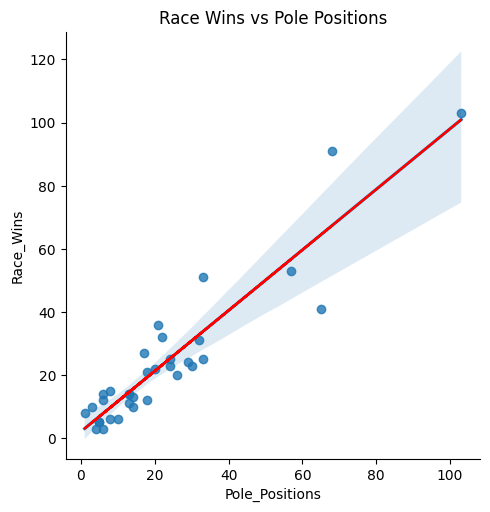

In [ ]:
def linear_regression(df, predictor, target):

    X = df[predictor].values.reshape(-1,1)
    y = df[target].values.reshape(-1,1)

    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    prediction_score = mean_squared_error(y, y_pred)
    r_squared = regressor.score(X, y)
    corr_coef = df[predictor].corr(df[target])

    #visualizing predictor and target
    fig = sns.lmplot(x=predictor,y=target,data=df)

    plt.plot(df[predictor], regressor.predict(df[[predictor]]), color='red')
    plt.title('Race Wins vs Pole Positions')
    plt.show()
    return corr_coef, r_squared, y_pred, prediction_score, fig

print('prediction_score', prediction_score)
print('correlation coefficient', corr_coef)
print('R-squared:', r_squared)

corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')